In [52]:
df[df['sick_cd']=='*****']

,mid,sick_sno,dmd_dgsbjt_cd,sick_cd


In [61]:
df=pd.read_csv('data/df_40_f.csv')
df.drop(df.columns[0],axis=1,inplace=True)

In [94]:
df['cd']=df['sick_cd'].apply(lambda x : x[0])
df['cdn']=df['sick_cd'].apply(lambda x : x[1:])
df['count']=1

In [95]:
df.drop(df[df["cdn"]=='***'].index,inplace=True)

In [100]:
df

,mid,sick_sno,dmd_dgsbjt_cd,sick_cd,cd,cdn,count
0,15502800,1,6,R51,R,51,1
1,11530802,1,3,F34,F,34,1
2,4171554,1,3,F41,F,41,1
3,9042145,1,3,F95,F,95,1
4,12360034,1,1,R51,R,51,1
...,...,...,...,...,...,...,...
521758,8947110,9,11,A099,A,099,1
521759,6088266,9,1,K30,K,30,1
521760,13730856,9,6,K590,K,590,1
521761,13803723,9,50,F31,F,31,1


In [115]:
def mid_list_get(df):
    tmp_list ={ }
    for x in df['cd'].unique():
        tmp_list[x]=df['mid'][df['cd']==x] 
    return tmp_list 

In [118]:
mid_list=mid_list_get(df)

0         15502800
4         12360034
6         14852332
46          386302
151        2019936
            ...   
521740      783931
521742     9304381
521749     2007873
521751     2540970
521754     5937642
Name: mid, Length: 22726, dtype: int64

In [130]:
key=list(mid_list.keys())
value=['감염성&기생충','감염성&기생충(피부)','종양','조혈기관&면역성','내분비&영양대사','정신질환','신경계','눈,귀','순환계','호흡기','소화기'
      ,'피부&피하조직','근골격&결합조직','비뇨기','산후기','출생전특정병','유전성기형변형','분류불가이상','손상중독외인','교통사고','의학보건서비스접촉']

In [132]:
mid_list=mid_list_get(df)
document=dict(zip(key,value))
document

{'R': '감염성&기생충',
 'F': '감염성&기생충(피부)',
 'K': '종양',
 'G': '조혈기관&면역성',
 'S': '내분비&영양대사',
 'J': '정신질환',
 'I': '신경계',
 'N': '눈,귀',
 'A': '순환계',
 'Z': '호흡기',
 'M': '소화기',
 'E': '피부&피하조직',
 'D': '근골격&결합조직',
 'L': '비뇨기',
 'H': '산후기',
 'C': '출생전특정병',
 'P': '유전성기형변형',
 'Q': '분류불가이상',
 'B': '손상중독외인',
 'O': '교통사고',
 'V': '의학보건서비스접촉'}

In [148]:
len(mid_list['D'].values), mid_list.keys()

(796,
 dict_keys(['R', 'F', 'K', 'G', 'S', 'J', 'I', 'N', 'A', 'Z', 'M', 'E', 'D', 'L', 'H', 'C', 'P', 'Q', 'B', 'O', 'V']))

In [164]:
data={'number' : [len(mid_list[x].values) for x in mid_list.keys()],'sick_tp':mid_list.keys()}

In [177]:
tmp=pd.DataFrame(data).drop(1).sort_values('number',ascending=False)

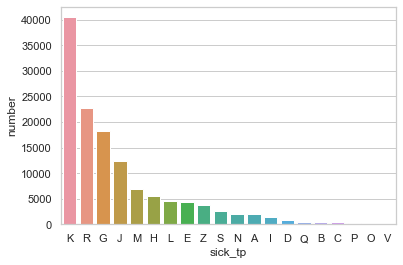

In [180]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="sick_tp", y="number", data=tmp)

In [183]:
document['K']

'종양'